In [1]:
# Based on approach (Bengio et al. 2003): https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
# https://www.youtube.com/watch?v=TCH_1BHY58I&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3
# https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part2_mlp.ipynb



In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [7]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    #print(context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(f'{context} -> {ix}')
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        #print(context[1:])
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        #print(context[1:] +[ix])
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
[0, 0, 0] -> 5
... ---> e
[0, 0, 5] -> 13
..e ---> m
[0, 5, 13] -> 13
.em ---> m
[5, 13, 13] -> 1
emm ---> a
[13, 13, 1] -> 0
mma ---> .
olivia
[0, 0, 0] -> 15
... ---> o
[0, 0, 15] -> 12
..o ---> l
[0, 15, 12] -> 9
.ol ---> i
[15, 12, 9] -> 22
oli ---> v
[12, 9, 22] -> 9
liv ---> i
[9, 22, 9] -> 1
ivi ---> a
[22, 9, 1] -> 0
via ---> .
ava
[0, 0, 0] -> 1
... ---> a
[0, 0, 1] -> 22
..a ---> v
[0, 1, 22] -> 1
.av ---> a
[1, 22, 1] -> 0
ava ---> .
isabella
[0, 0, 0] -> 9
... ---> i
[0, 0, 9] -> 19
..i ---> s
[0, 9, 19] -> 1
.is ---> a
[9, 19, 1] -> 2
isa ---> b
[19, 1, 2] -> 5
sab ---> e
[1, 2, 5] -> 12
abe ---> l
[2, 5, 12] -> 12
bel ---> l
[5, 12, 12] -> 1
ell ---> a
[12, 12, 1] -> 0
lla ---> .
sophia
[0, 0, 0] -> 19
... ---> s
[0, 0, 19] -> 15
..s ---> o
[0, 19, 15] -> 16
.so ---> p
[19, 15, 16] -> 8
sop ---> h
[15, 16, 8] -> 9
oph ---> i
[16, 8, 9] -> 1
phi ---> a
[8, 9, 1] -> 0
hia ---> .


In [8]:
X.shape

torch.Size([32, 3])

#### Embedding Layer

 this layer maps input information from a high-dimensional to a lower-dimensional space, allowing the network to learn more about the relationship between inputs and to process the data more efficiently. 

In [9]:
C = torch.randn((27, 2))
print(C[20:27])
print(C[0])
print(X[27,2])
print(C[X][15])

print(C.shape)
print(X.shape)
print((C[X].shape))

tensor([[ 0.3169,  0.0142],
        [ 0.2372,  0.8200],
        [ 1.5936, -0.8448],
        [ 0.8791,  0.0877],
        [-1.4997,  0.3643],
        [ 0.1597, -0.5721],
        [-0.2213, -0.4208]])
tensor([-0.4357,  1.4900])
tensor(15)
tensor([[ 0.5317, -1.1273],
        [ 1.5936, -0.8448],
        [ 0.5317, -1.1273]])
torch.Size([27, 2])
torch.Size([32, 3])
torch.Size([32, 3, 2])


In [10]:
C[5]

tensor([-0.6385, -0.8685])

In [11]:
# is equivalent to the the weight matrix: so this the first layer of this neural network is just coming from the weight matrix
F.one_hot(torch.tensor(5), num_classes=27).float() @ C 

tensor([-0.6385, -0.8685])

In [12]:
C[[5,6,7]]

tensor([[-0.6385, -0.8685],
        [-1.6415, -1.1567],
        [-0.2257,  1.4006]])

In [13]:
# Relationship
print(X[14,2])
print(C[X][14,2])
print(C[22])
#print(C[X].shape)
print(C[X])

tensor(22)
tensor([ 1.5936, -0.8448])
tensor([ 1.5936, -0.8448])
tensor([[[-0.4357,  1.4900],
         [-0.4357,  1.4900],
         [-0.4357,  1.4900]],

        [[-0.4357,  1.4900],
         [-0.4357,  1.4900],
         [-0.6385, -0.8685]],

        [[-0.4357,  1.4900],
         [-0.6385, -0.8685],
         [ 0.1459,  0.3269]],

        [[-0.6385, -0.8685],
         [ 0.1459,  0.3269],
         [ 0.1459,  0.3269]],

        [[ 0.1459,  0.3269],
         [ 0.1459,  0.3269],
         [ 0.5317, -1.1273]],

        [[-0.4357,  1.4900],
         [-0.4357,  1.4900],
         [-0.4357,  1.4900]],

        [[-0.4357,  1.4900],
         [-0.4357,  1.4900],
         [-1.0040, -0.8634]],

        [[-0.4357,  1.4900],
         [-1.0040, -0.8634],
         [ 0.3163,  0.9469]],

        [[-1.0040, -0.8634],
         [ 0.3163,  0.9469],
         [-0.1152, -0.2190]],

        [[ 0.3163,  0.9469],
         [-0.1152, -0.2190],
         [ 1.5936, -0.8448]],

        [[-0.1152, -0.2190],
         [ 1.593

In [14]:
X.shape
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

#### Hidden Layer

In [16]:
W1 = torch.randn(6, 100) 
b1 = torch.randn(100) 

In [17]:
print(torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1).shape)
torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1)

torch.Size([32, 6])


tensor([[-0.4357,  1.4900, -0.4357,  1.4900, -0.4357,  1.4900],
        [-0.4357,  1.4900, -0.4357,  1.4900, -0.6385, -0.8685],
        [-0.4357,  1.4900, -0.6385, -0.8685,  0.1459,  0.3269],
        [-0.6385, -0.8685,  0.1459,  0.3269,  0.1459,  0.3269],
        [ 0.1459,  0.3269,  0.1459,  0.3269,  0.5317, -1.1273],
        [-0.4357,  1.4900, -0.4357,  1.4900, -0.4357,  1.4900],
        [-0.4357,  1.4900, -0.4357,  1.4900, -1.0040, -0.8634],
        [-0.4357,  1.4900, -1.0040, -0.8634,  0.3163,  0.9469],
        [-1.0040, -0.8634,  0.3163,  0.9469, -0.1152, -0.2190],
        [ 0.3163,  0.9469, -0.1152, -0.2190,  1.5936, -0.8448],
        [-0.1152, -0.2190,  1.5936, -0.8448, -0.1152, -0.2190],
        [ 1.5936, -0.8448, -0.1152, -0.2190,  0.5317, -1.1273],
        [-0.4357,  1.4900, -0.4357,  1.4900, -0.4357,  1.4900],
        [-0.4357,  1.4900, -0.4357,  1.4900,  0.5317, -1.1273],
        [-0.4357,  1.4900,  0.5317, -1.1273,  1.5936, -0.8448],
        [ 0.5317, -1.1273,  1.5936, -0.8

In [18]:
# more efficent: idependent of number of emb
torch.cat(torch.unbind(emb, 1),1).shape 

torch.Size([32, 6])

In [19]:
# even more efficient
a = torch.arange(18)
a

print(a.view(9,2))
print(a.view(9,2))
print(a.view(3,3,2))

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [20]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [21]:
print((emb.view(emb.shape[0],6) @ W1 + b1).shape)
print(emb.view(emb.shape[0],6) @ W1 + b1)


torch.Size([32, 100])
tensor([[-1.4993,  1.4070,  1.3257,  ...,  1.1486, -4.7225, -3.1736],
        [-4.6467,  2.7861,  3.1260,  ...,  1.1998, -0.8403, -4.1235],
        [ 3.7698, -0.9081,  4.9291,  ...,  1.9360, -1.6880, -3.1540],
        ...,
        [ 0.2589, -1.8911,  1.1457,  ..., -0.6189,  1.7728,  0.4605],
        [ 0.9519, -0.9406,  2.3613,  ...,  3.5318,  1.8744,  0.1625],
        [-1.1747, -1.9312,  2.0929,  ..., -0.1855,  2.1534, -0.2801]])


In [22]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1

In [23]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)


In [24]:
logits = h @ W2 + b2
logits.shape

# Softmax
counts = logits.exp()  # equivalent to N matrix from above
prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities
print(prob.shape)
print(prob[0].sum())

torch.Size([32, 27])
tensor(1.0000)


In [25]:
prob[torch.arange(32), Y]

tensor([3.3697e-07, 2.3041e-12, 3.6705e-09, 1.1797e-06, 3.6595e-06, 1.7839e-01,
        3.2927e-12, 7.3873e-11, 5.2688e-07, 2.3563e-12, 2.9127e-09, 1.2228e-06,
        3.6645e-08, 7.3648e-09, 3.0249e-07, 9.5049e-11, 1.1246e-08, 1.6068e-08,
        2.9828e-03, 1.0006e-07, 8.6187e-01, 8.0797e-02, 1.3019e-09, 3.8631e-08,
        3.1856e-10, 1.2418e-07, 9.9086e-01, 1.5641e-08, 1.6668e-11, 3.0973e-06,
        4.0451e-05, 8.0678e-12])

In [26]:
-prob[torch.arange(32), Y].log().mean()

tensor(16.0783)

#### More Comprehensive 

In [27]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia


In [51]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [35]:
#emb = C[X]
#h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
#logits = h @ W2 + b2
#counts = logits.exp()  # equivalent to N matrix from above
#prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities

#loss1 = -prob[torch.arange(32), Y].log().mean()
#print(loss1)

In [52]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)  # equivalent, but much more efficient. + logits.exp() can produce values up to infinity; F.cross_entropy substracts the maximum value internally and solves this problem
print(loss)

tensor(17.7697)


In [55]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(1000):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

0.2560916244983673
0.2560735046863556
0.2560809254646301
0.25606289505958557
0.25607022643089294
0.25605228543281555
0.25605955719947815
0.2560417056083679
0.25604894757270813
0.2560311555862427
0.2560383081436157
0.2560206651687622
0.25602781772613525
0.2560103237628937
0.2560174763202667
0.2560000419616699
0.2560070753097534
0.2559897005558014
0.2559967637062073
0.2559795081615448
0.2559864819049835
0.2559693455696106
0.25597625970840454
0.2559591829776764
0.25596603751182556
0.2559490203857422
0.25595587491989136
0.25593894720077515
0.25594571232795715
0.2559289038181305
0.2559356391429901
0.2559189200401306
0.25592562556266785
0.2559090256690979
0.2559156119823456
0.2558990716934204
0.25590571761131287
0.25588923692703247
0.25589582324028015
0.2558794617652893
0.2558860182762146
0.25586968660354614
0.25587618350982666
0.25585997104644775
0.2558664381504059
0.25585025548934937
0.2558567523956299
0.2558406591415405
0.2558470666408539
0.2558310925960541
0.25583744049072266
0.255821526

#### Full Model

In [280]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [281]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [282]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(100):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

19.505226135253906
17.084482192993164
15.776534080505371
14.833343505859375
14.002605438232422
13.253263473510742
12.57992172241211
11.98310375213623
11.47049331665039
11.051856994628906
10.709587097167969
10.407631874084473
10.127808570861816
9.864365577697754
9.614501953125
9.376439094543457
9.148944854736328
8.931108474731445
8.722230911254883
8.521748542785645
8.32922649383545
8.144325256347656
7.966791152954102
7.796450138092041
7.633184909820557
7.476907730102539
7.327521800994873
7.1848859786987305
7.048791885375977
6.918952465057373
6.795017719268799
6.676603317260742
6.563319206237793
6.4547905921936035
6.350669860839844
6.250644207000732
6.15443229675293
6.061786651611328
5.972483158111572
5.88632869720459
5.803147315979004
5.722784042358398
5.6450958251953125
5.5699462890625
5.497213840484619
5.42678165435791
5.358536720275879
5.29237699508667
5.228204250335693
5.165929317474365
5.105469703674316
5.046748638153076
4.9897003173828125
4.934263229370117
4.8803815841674805
4.828

#### How to determine Learning Rate parameter?

In [283]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [284]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [285]:
# 
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
print(lrs)

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [286]:
# Add multiple minibatches
gix = torch.Generator().manual_seed(2147483647)
lri = []
losses = []

for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X.shape[0], (128,), generator=gix)  # here also a seed should be set

    # Forward Pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    
    # Track Learning Rate and Loss
    lri.append(lre[i])
    losses.append(loss.item())


18.425764083862305
19.28973388671875
19.908584594726562
19.994861602783203
19.02876853942871
19.008129119873047
18.541881561279297
19.928159713745117
18.801971435546875
19.136676788330078
18.99948501586914
18.30936050415039
18.489086151123047
18.76942253112793
18.496932983398438
18.069791793823242
17.74345588684082
18.874927520751953
18.734853744506836
18.534954071044922
20.812955856323242
19.168643951416016
19.748950958251953
19.372217178344727
18.357044219970703
19.27820587158203
18.87006187438965
18.791507720947266
19.371501922607422
17.582746505737305
18.543304443359375
19.61582374572754
16.695711135864258
18.230871200561523
18.736854553222656
17.998828887939453
18.512306213378906
17.57440757751465
17.065319061279297
18.643352508544922
18.062402725219727
18.153850555419922
19.31407356262207
17.687774658203125
18.36347770690918
20.059297561645508
16.357425689697266
17.318904876708984
18.235139846801758
18.62967300415039
18.829111099243164
18.872629165649414
17.332639694213867
19.524

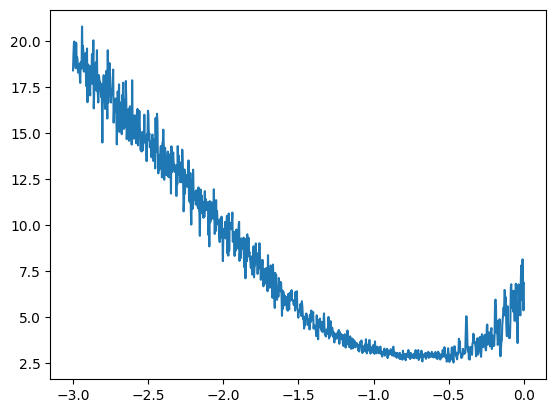

In [287]:
plt.plot(lri, losses) # Learning Rate around 10**-1 = 0.1

#### Use Train, Def/Validation, and Test Splits

In [421]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])


In [422]:
seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 300, generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

In [423]:
# Add multiple minibatches
steps=[]
losses=[]
for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (128,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats
    steps.append(i)
    losses.append(loss.item())
#print(loss.item())


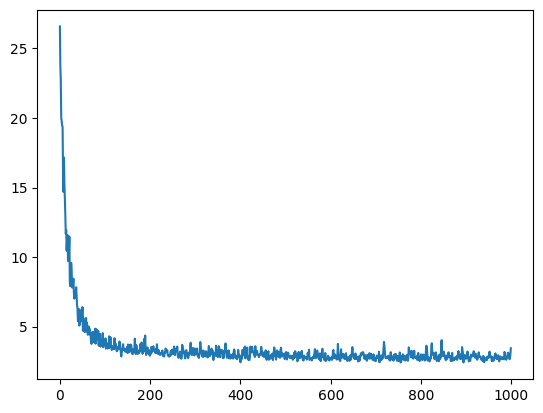

In [424]:
plt.plot(steps, losses)

In [425]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

tensor(2.7062, grad_fn=<NllLossBackward0>)

In [426]:
emb = C[X_val]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_val) 
loss_dev

tensor(2.7092, grad_fn=<NllLossBackward0>)

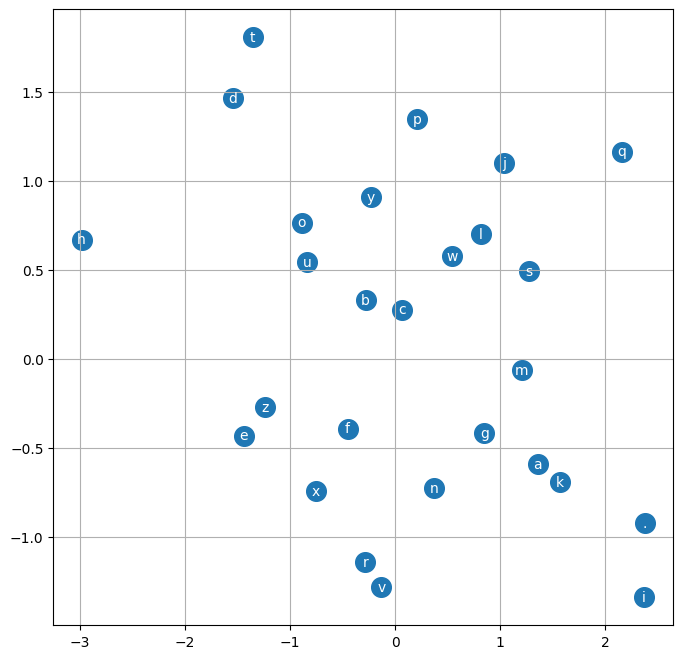

In [462]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

#### Increase Imeddings

In [449]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])



seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 20), generator=g)
W1 = torch.randn(60, 500, generator=g)
b1 = torch.randn(500, generator=g)
W2 = torch.randn((500, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

# Add multiple minibatches
steps=[]
losses=[]



In [450]:
for p in parameters:
    p.requires_grad = True
    
for i in range(30000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (512,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats

    steps.append(i)
    losses.append(loss.log10().item())
    #print(len(steps),len(losses))
#print(loss.item())

In [451]:
len(steps), len(losses)

(30000, 30000)

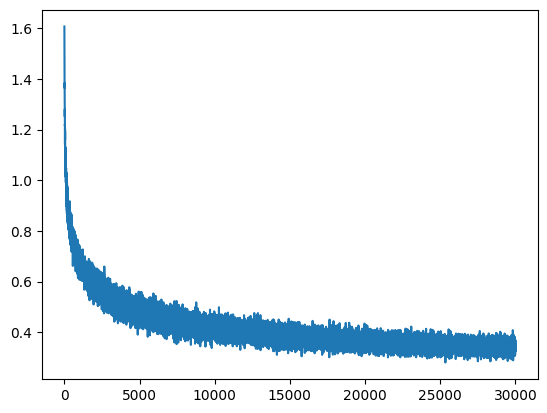

In [452]:
plt.plot(steps, losses)

In [453]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

tensor(2.1816, grad_fn=<NllLossBackward0>)

In [454]:
emb = C[X_test]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_test) 
loss_dev

tensor(2.4796, grad_fn=<NllLossBackward0>)

In [461]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 1000)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

naitalise.
tahiisabell.
aamley.
len.
lana.
aadi.
suhamariennere.
rash.
damarion.
wiselistie.
merasheille.
stine.
zaela.
emosey.
can.
nina.
sha.
ireoluwarnee.
avana.
arnelizghyus.


#### Add another layer